In [1]:
import nltk
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to D:\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [3]:
nltk.corpus.treebank.tagged_sents()

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], ...]

In [4]:
tagged_sentences = nltk.corpus.treebank.tagged_sents() # 토큰화에 품사 태깅이 된 데이터 받아오기
print("품사 태깅이 된 문장 개수: ", len(tagged_sentences)) # 문장 샘플의 개수 출력

품사 태깅이 된 문장 개수:  3914


In [5]:
tagged_sentences[3913]

[('Trinity', 'NNP'),
 ('said', 'VBD'),
 ('0', '-NONE-'),
 ('it', 'PRP'),
 ('plans', 'VBZ'),
 ('*-1', '-NONE-'),
 ('to', 'TO'),
 ('begin', 'VB'),
 ('delivery', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('quarter', 'NN'),
 ('of', 'IN'),
 ('next', 'JJ'),
 ('year', 'NN'),
 ('.', '.')]

In [6]:
x = [1, 2, 3]
y = [4, 5, 6]
 
zipped = zip(x, y)
print(list(zipped))

[(1, 4), (2, 5), (3, 6)]


In [7]:
from itertools import zip_longest # 자동 padding 

In [9]:
x = [1, 2, 3]
y = [4, 5, 6,7]


# 1) zip_longest 적용
zipped = zip_longest(x, y)
print(list(zipped))
'''
결과
[(1, 4), (2, 5), (3, 6), (None, 7)]
'''
 
# 2) fillvalue= 인자에 값을 지정
zipped = zip_longest(x, y, fillvalue=0)
print(list(zipped))

[(1, 4), (2, 5), (3, 6), (None, 7)]
[(1, 4), (2, 5), (3, 6), (0, 7)]


In [10]:
sentences, pos_tags = [], [] 
for tagged_sentence in tagged_sentences: # 3,914개의 문장 샘플을 1개씩 불러온다.
    sentence, tag_info = zip(*tagged_sentence) # 각 샘플에서 단어들은 sentence에 품사 태깅 정보들은 tag_info에 저장한다.
    sentences.append(list(sentence)) # 각 샘플에서 단어 정보만 저장한다.
    pos_tags.append(list(tag_info)) # 각 샘플에서 품사 태깅 정보만 저장한다.

In [11]:
print(sentences[0])
print(pos_tags[0])

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'MD', 'VB', 'DT', 'NN', 'IN', 'DT', 'JJ', 'NN', 'NNP', 'CD', '.']


In [19]:
sen_len = list(map(len,sentences))
print('샘플 최대 길이 : ',max(sen_len))
print('샘플 평균 길이 : ',sum(sen_len)/len(sen_len))

샘플 최대 길이 :  271
샘플 평균 길이 :  25.722023505365357


샘플의 최대 길이 : 271
샘플의 평균 길이 : 25.722024


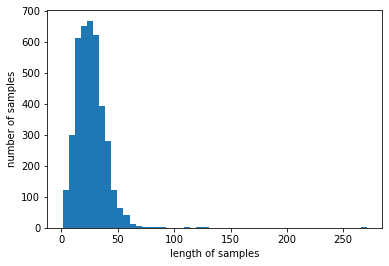

In [15]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [16]:
def tokenize(samples):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(samples)
    return tokenizer

In [17]:
src_tokenizer = tokenize(sentences)
tar_tokenizer = tokenize(pos_tags)

In [18]:
vocab_size = len(src_tokenizer.word_index)+1
target_size = len(tar_tokenizer.word_index)+1

In [20]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(pos_tags)

In [21]:
X_train[0]

[5601,
 3746,
 1,
 2024,
 86,
 331,
 1,
 46,
 2405,
 2,
 131,
 27,
 6,
 2025,
 332,
 459,
 2026,
 3]

__최대 길이 통일 : padding__

In [22]:
max_len = 100
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
# X_train의 모든 샘플의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)
# y_train의 모든 샘플의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.

__데이터 분할__

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=777)

__원핫인코딩__

In [25]:
y_train = to_categorical(y_train, num_classes=target_size)
y_test = to_categorical(y_test, num_classes=target_size)

In [26]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (3131, 100)
훈련 샘플 레이블의 크기 : (3131, 100, 47)
테스트 샘플 문장의 크기 : (783, 100)
테스트 샘플 레이블의 크기 : (783, 100, 47)


__mask_zero = 0으로 패딩된 값을 마스킹하여 네트워크의 뒤로 전달되지 않게 하겠다__

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, Embedding
from keras.optimizers import Adam
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dense(target_size, activation=('softmax')))
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=6,  validation_data=(X_test, y_test))

Epoch 1/6
25/25 [==============================] - 57s 2s/step - loss: 0.8562 - accuracy: 0.1408 - val_loss: 0.7576 - val_accuracy: 0.1774
Epoch 2/6
25/25 [==============================] - 51s 2s/step - loss: 0.7368 - accuracy: 0.2234 - val_loss: 0.6910 - val_accuracy: 0.3993
Epoch 3/6
25/25 [==============================] - 54s 2s/step - loss: 0.6159 - accuracy: 0.4347 - val_loss: 0.4959 - val_accuracy: 0.4937
Epoch 4/6
25/25 [==============================] - 53s 2s/step - loss: 0.3952 - accuracy: 0.6025 - val_loss: 0.2916 - val_accuracy: 0.7346
Epoch 5/6
25/25 [==============================] - 53s 2s/step - loss: 0.2131 - accuracy: 0.8186 - val_loss: 0.1583 - val_accuracy: 0.8645
Epoch 6/6
25/25 [==============================] - 55s 2s/step - loss: 0.1071 - accuracy: 0.9129 - val_loss: 0.1017 - val_accuracy: 0.9044


In [29]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

25/25 [==============================] - 8s 330ms/step - loss: 0.1017 - accuracy: 0.9044

 테스트 정확도: 0.9044


In [30]:
index_to_word=src_tokenizer.index_word
index_to_tag=tar_tokenizer.index_word

In [31]:
X_test[10]

array([   7,  499,    1,  681,   20,    6, 1058, 3612, 5276,  232,  154,
        636,  509,  823,    1,   53,   10,   15,   39,  154,  636, 1379,
          3,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [32]:
y_test[10]

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
y_predicted = model.predict(X_test[10])

In [35]:
y_predicted.shape

(100, 1, 47)

In [37]:
y_predicted = np.argmax(y_predicted,axis=-1)

In [41]:
np.argmax(y_test[10],axis=-1)

array([ 2,  1,  8,  3, 17,  4, 12, 16,  1,  2,  3,  3,  1,  6,  8, 17,  5,
        5,  4,  3,  3,  1,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [45]:
y_predicted.ravel()

array([ 2,  1,  8,  3, 17,  4, 12,  5,  1,  2,  3,  3,  1,  6,  8, 17,  5,
        5,  4,  3,  3,  1,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype=int64)

In [46]:
i=10 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_tag[t].upper(), index_to_tag[pred].upper()))

단어             |실제값  |예측값
-----------------------------------
in               : IN      IN
addition         : NN      NN
,                : ,       ,
buick            : NNP     NNP
is               : VBZ     VBZ
a                : DT      DT
relatively       : RB      RB
respected        : VBN     VBN
nameplate        : NN      NN
among            : IN      IN
american         : NNP     NNP
express          : NNP     NNP
card             : NN      NN
holders          : NNS     NNS
,                : ,       ,
says             : VBZ     VBZ
0                : -NONE-  -NONE-
*t*-1            : -NONE-  -NONE-
an               : DT      DT
american         : NNP     NNP
express          : NNP     NNP
spokeswoman      : NN      NN
.                : .       .


In [47]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_ne_chunker to D:\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to D:\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to D:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     D:\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [49]:
from nltk import word_tokenize, pos_tag, ne_chunk

In [55]:
sentence = "DongJae is working at Samsung in Suwon"
word_tokenize(sentence)
k=pos_tag(word_tokenize(sentence))
k

[('DongJae', 'NNP'),
 ('is', 'VBZ'),
 ('working', 'VBG'),
 ('at', 'IN'),
 ('Samsung', 'NNP'),
 ('in', 'IN'),
 ('Suwon', 'NNP')]

In [56]:
print(ne_chunk(k))

(S
  (GSP DongJae/NNP)
  is/VBZ
  working/VBG
  at/IN
  (ORGANIZATION Samsung/NNP)
  in/IN
  (GPE Suwon/NNP))


In [57]:
sentence = "Do people working at Apple eat apple?"
word_tokenize(sentence)
k=pos_tag(word_tokenize(sentence))
print(ne_chunk(k))

(S
  Do/VBP
  people/NNS
  working/VBG
  at/IN
  (ORGANIZATION Apple/NNP)
  eat/NN
  apple/NN
  ?/.)


수업 링크  
- [https://raw.githubusercontent.com/Franck-Dernoncourt/NeuroNER/master/neuroner/data/conll2003/en/train.txt](https://raw.githubusercontent.com/Franck-Dernoncourt/NeuroNER/master/neuroner/data/conll2003/en/train.txt)  
- [https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)